In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [53]:
df = pd.read_excel(r'C:\Users\shiwi\OneDrive\Desktop\terrorist_data.xlsx')

In [57]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000000,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000000,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197000000000,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197000000000,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197000000000,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [58]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['Casualities']=df['Killed']+df['Wounded']
df=df

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  Casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [60]:
df_us = df[df['Country'] == 'United States']

In [61]:
df_us.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0
10,1970,1,1,United States,North America,Baraboo,43.468500,-89.744299,Bombing/Explosion,0.0,0.0,Badger Army ammo depot.,NaN,"Weather Underground, Weathermen",Military,Explosives,NaN,0.0


In [62]:
df_us['Group'].value_counts().head(5)

Unknown                                          573
Anti-Abortion extremists                         196
Left-Wing Militants                              169
Fuerzas Armadas de Liberacion Nacional (FALN)    120
White extremists                                  87
Name: Group, dtype: int64

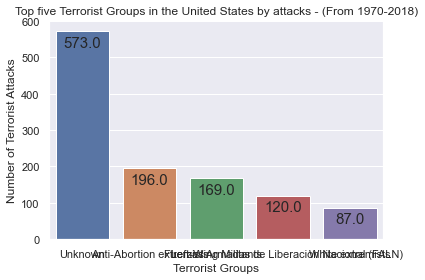

In [63]:
ax = sns.barplot(df_us['Group'].value_counts().head(5).index, y = df_us['Group'].value_counts().head(5))


ax.set(xlabel="Terrorist Groups", ylabel = "Number of Terrorist Attacks", title = 'Top five Terrorist Groups in the United States by attacks - (From 1970-2018)')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.tight_layout()

sns.set(rc={'figure.figsize':(13,10)})
plt.savefig('save_as_a_png.png')

In [64]:
df_us[df_us['Group'] == 'Unknown']

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,0.0
40,1970,1,31,United States,North America,Denver,39.758968,-104.876305,Bombing/Explosion,0.0,0.0,"Police Band Building, Denver Colorado",1/31/1970: Unknown perpetrators bombed the Pol...,Unknown,Police,Explosives,NaN,0.0
43,1970,2,2,United States,North America,New York City,40.697132,-73.931351,Facility/Infrastructure Attack,0.0,0.0,Mays Department Store in Manhattan,2/2/1970: An incendiary device was discovered ...,Unknown,Business,Incendiary,NaN,0.0
44,1970,2,3,United States,North America,New York City,40.697132,-73.931351,Facility/Infrastructure Attack,0.0,0.0,Alexander's Department Store in the Bronx,"2/3/1970: In a series of related attacks, an i...",Unknown,Business,Incendiary,NaN,0.0
45,1970,2,3,United States,North America,New York City,40.697132,-73.931351,Facility/Infrastructure Attack,0.0,0.0,Alexander's Department Store in Manhattan,"2/3/1970: In a series of related attacks, an i...",Unknown,Business,Incendiary,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178079,2017,8,19,United States,North America,Houston,29.813822,-95.365295,Bombing/Explosion,0.0,0.0,Monument,08/19/2017: An assailant was arrested while at...,Unknown,Private Citizens & Property,Explosives,"The specific motive is unknown; however, sourc...",0.0
179098,2017,9,24,United States,North America,Antioch,36.046771,-86.583081,Armed Assault,1.0,8.0,Church,09/24/2017: An assailant opened fire on Burnet...,Unknown,Religious Figures/Institutions,Firearms,"An unaffiliated individual, identified as Eman...",9.0
179474,2017,10,6,United States,North America,Fletcher,35.437653,-82.537256,Bombing/Explosion,0.0,0.0,Airport,10/06/2017: An explosive device was discovered...,Unknown,Airports & Aircraft,Explosives,"An unaffiliated individual, identified as Mich...",0.0
181478,2017,12,22,United States,North America,Harrisburg,40.262772,-76.881107,Armed Assault,0.0,0.0,Vehicle,12/22/2017: An assailant opened fire on a Penn...,Unknown,Police,Firearms,NaN,0.0


In [65]:
filt = df[(df['Country'] == 'United States') & (df['Group'] == 'Unknown')]

filt['Group'].count()

573

C:\Users\shiwi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

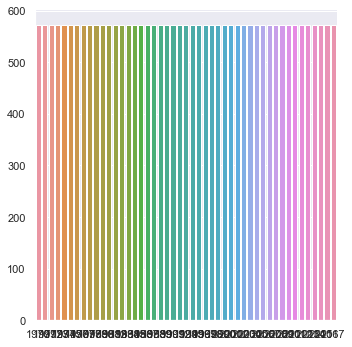

In [66]:
sns.catplot(x=df['Year'],y=filt['Group'].count(),data=df,kind='bar')